In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
merge_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SPH6004/Pre-processed Static and Dynamic V2/merged_train.csv')
merge_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SPH6004/Pre-processed Static and Dynamic V2/merged_test.csv')
merge_holdout = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SPH6004/Pre-processed Static and Dynamic V2/merged_holdout.csv')

In [ ]:
y_train = merge_train['los_icu'].values
y_holdout = merge_holdout['los_icu'].values
y_test = merge_test['los_icu'].values

In [ ]:
X_train = merge_train.drop(columns=['id','hosp_admittime', 'hosp_dischtime',
       'icu_intime', 'icu_outtime', 'los_icu', 'icu_death','race','charttime'],axis = 1)
X_holdout = merge_holdout.drop(columns=['id','hosp_admittime', 'hosp_dischtime',
       'icu_intime', 'icu_outtime', 'los_icu', 'icu_death','race','charttime'], axis = 1)
X_test = merge_test.drop(columns=['id','hosp_admittime', 'hosp_dischtime',
       'icu_intime', 'icu_outtime', 'los_icu', 'icu_death','race','charttime'], axis = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_holdout = scaler.fit_transform(X_holdout)
X_test = scaler.fit_transform(X_test)
X_train.shape

(64985, 61)

In [ ]:
def create_sequences(data, seq_length):
    new_samples = data.shape[0] - seq_length + 1
    sequences = np.empty((data.shape[0], seq_length, data.shape[1]))  # 使用原始数据的第一个维度长度初始化结果数组
    for i in range(new_samples):
        sequences[i] = data[i:i+seq_length]

    return sequences


In [ ]:
X_train_seq = create_sequences(X_train, 5)
X_holdout_seq = create_sequences(X_holdout, 5)
X_test_seq = create_sequences(X_test, 5)
X_train_seq.shape

(64985, 5, 61)

In [ ]:
# X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
# X_holdout_reshaped = X_holdout.reshape(X_holdout.shape[0], 1, X_holdout.shape[1])
# X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
X_train= np.array(X_train_seq)
X_holdout = np.array(X_holdout_seq)
X_test = np.array(X_test_seq)
y_train = np.array(y_train)
y_holdout = np.array(y_holdout)
y_test = np.array(y_test)


In [ ]:
y_train.shape

(64985,)

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.losses import mean_squared_error
from keras.metrics import RootMeanSquaredError
from sklearn.metrics import mean_squared_error

model = Sequential()
model.add(LSTM(units=256, input_shape=(5, 61),return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=128,return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_holdout, y_holdout))



Epoch 1/20
1016/1016 [==============================] - 107s 102ms/step - loss: 28.4478 - val_loss: 18.3752
Epoch 2/20
1016/1016 [==============================] - 51s 50ms/step - loss: 18.2967 - val_loss: 17.5436
Epoch 3/20
1016/1016 [==============================] - 52s 51ms/step - loss: 12.8680 - val_loss: 19.2995
Epoch 4/20
1016/1016 [==============================] - 53s 52ms/step - loss: 8.9601 - val_loss: 19.9442
Epoch 5/20
1016/1016 [==============================] - 50s 49ms/step - loss: 6.8250 - val_loss: 18.1954
Epoch 6/20
1016/1016 [==============================] - 51s 50ms/step - loss: 5.3513 - val_loss: 17.6411
Epoch 7/20
1016/1016 [==============================] - 53s 52ms/step - loss: 4.2011 - val_loss: 19.1426
Epoch 8/20
1016/1016 [==============================] - 50s 49ms/step - loss: 3.6702 - val_loss: 19.8982
Epoch 9/20
1016/1016 [==============================] - 53s 52ms/step - loss: 3.1804 - val_loss: 19.6088
Epoch 10/20
1016/1016 [===========================

587/587 [==============================] - 9s 15ms/step
Test RMSE: 5.711066243596799


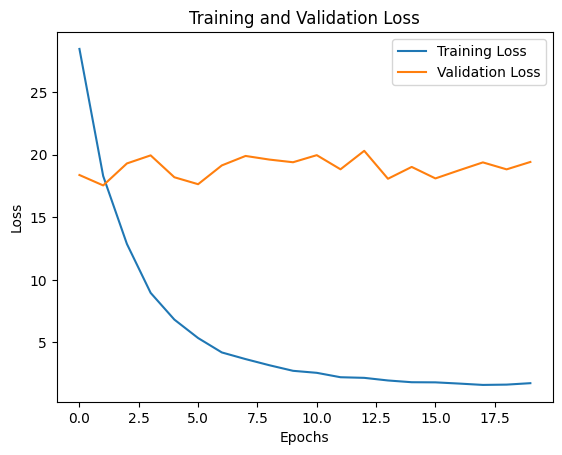

In [ ]:

y_pred = model.predict(X_test)


test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Test RMSE:", test_rmse)

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
print(y_pred)


[[1.9684355]
 [3.5322695]
 [3.562047 ]
 ...
 [4.2030973]
 [4.2030973]
 [4.2030973]]
